# Image Dataset Brightness Analysis

In [9]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
from scipy.stats import skew
from utils import *
import os
from tqdm import tqdm

## Dataset Average Brightness

In [2]:
label = ['Lion Cubs', 'Polaroid Original', 'Polaroid Cropped', 'Polaroid Cropped w/o Occlusion', 'Polaroid Cropped Sqrt Transform']
path = ['../../img_dataset/lioncubs/images/', 
        '../../img_dataset/polaroid/images/', 
        '../../img_dataset/polaroid_crop/images/',
        '../../img_dataset/polaroid_crop_best/images/',
        '../../img_dataset/polaroid_crop_sqrt/images/']

print('==================================================\n')
for idx in range(len(path)):
    print('Calculating:', label[idx])
    total_brightness = 0
    img_names = os.listdir(path[idx])
    for i in tqdm(img_names):
        img = cv2.imread(path[idx] + i)
        total_brightness += image_brightness(img)
    brightness = total_brightness / len(img_names)
    print(label[idx] + " Avg Brightness: " + str(round(brightness, 2)))
    print('\n==================================================\n')


Calculating: Lion Cubs


100%|██████████| 60/60 [00:29<00:00,  2.06it/s]


Lion Cubs Avg Brightness: 19.63


Calculating: Polaroid Original


100%|██████████| 101/101 [00:46<00:00,  2.18it/s]


Polaroid Original Avg Brightness: 9.75


Calculating: Polaroid Cropped


100%|██████████| 100/100 [00:09<00:00, 10.65it/s]


Polaroid Cropped Avg Brightness: 20.48


Calculating: Polaroid Cropped w/o Occlusion


100%|██████████| 47/47 [00:04<00:00, 10.57it/s]


Polaroid Cropped w/o Occlusion Avg Brightness: 23.94


Calculating: Polaroid Cropped Sqrt Transform


100%|██████████| 100/100 [00:08<00:00, 12.33it/s]

Polaroid Cropped Sqrt Transform Avg Brightness: 52.98




## Dataset Total Pixel Value Distribution
Total pixel value distribution histogram is plotted in order to pick a threshold. This threshold will then be used to determine so-called 'interest' area (the holography panel) and 'non-interest' area (the black background).

Plotting: Lion Cubs


100%|██████████| 60/60 [00:43<00:00,  1.39it/s]


Avg Skewness: 2.83


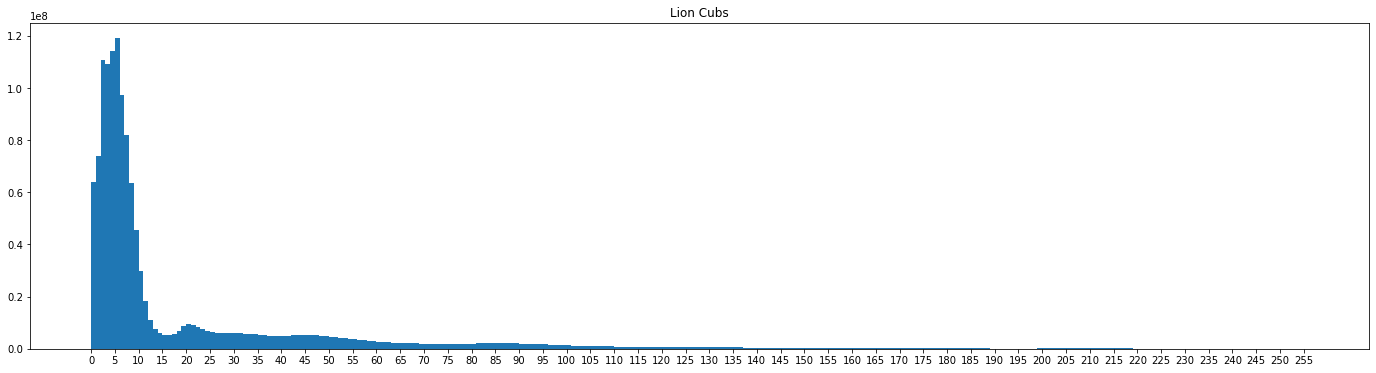

Plotting: Polaroid Original


100%|██████████| 101/101 [01:16<00:00,  1.31it/s]


Avg Skewness: 4.59


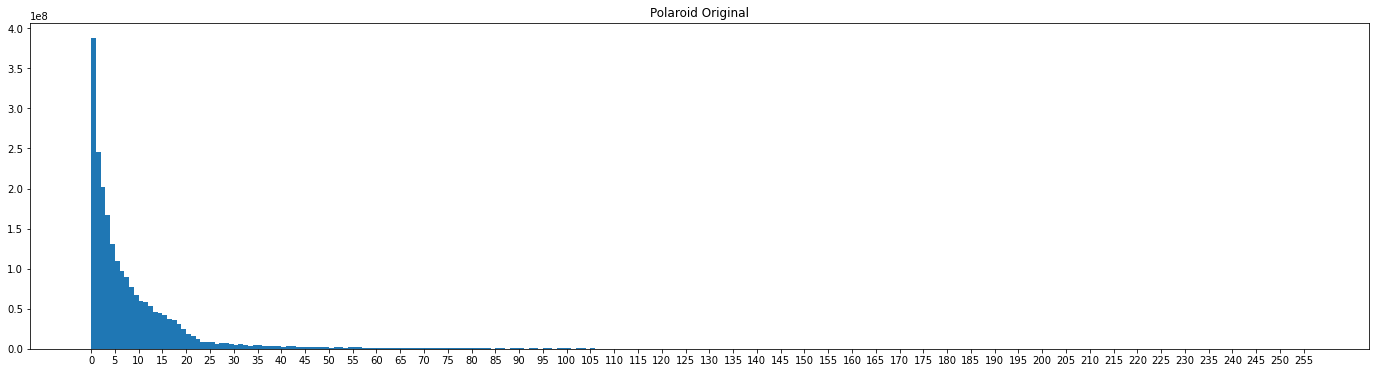

Plotting: Polaroid Cropped


100%|██████████| 100/100 [00:16<00:00,  5.89it/s]


Avg Skewness: 2.75


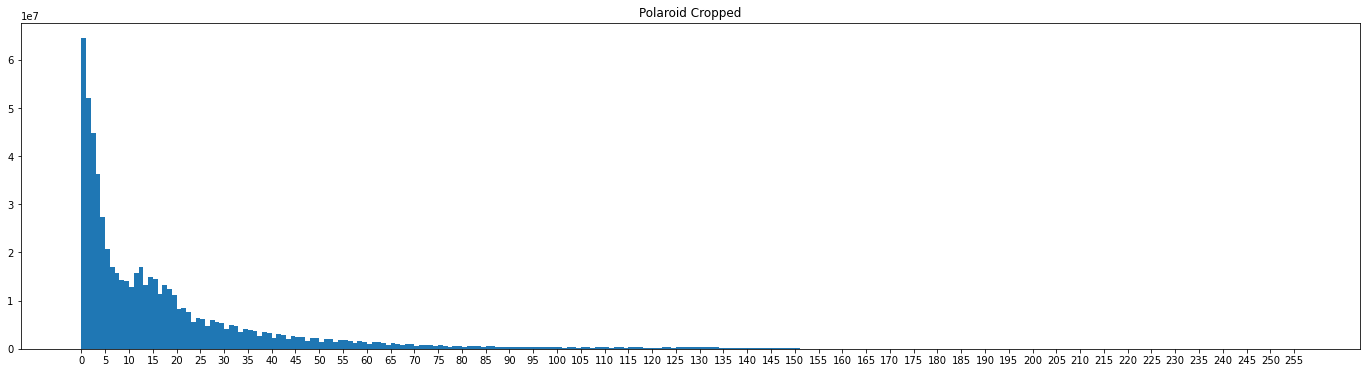

Plotting: Polaroid Cropped w/o Occlusion


100%|██████████| 47/47 [00:06<00:00,  6.87it/s]


Avg Skewness: 2.24


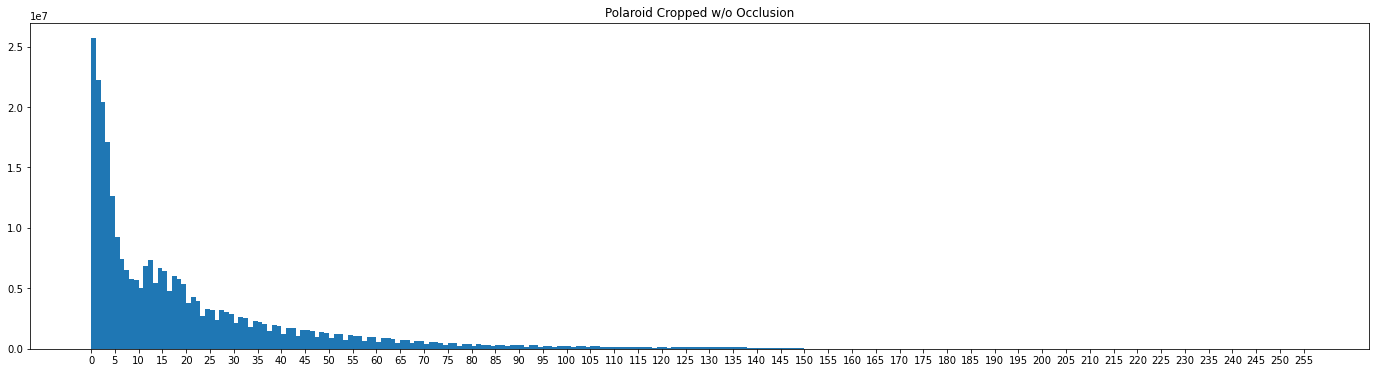

Plotting: Polaroid Cropped Sqrt Transform


100%|██████████| 100/100 [00:14<00:00,  6.70it/s]


Avg Skewness: 1.24


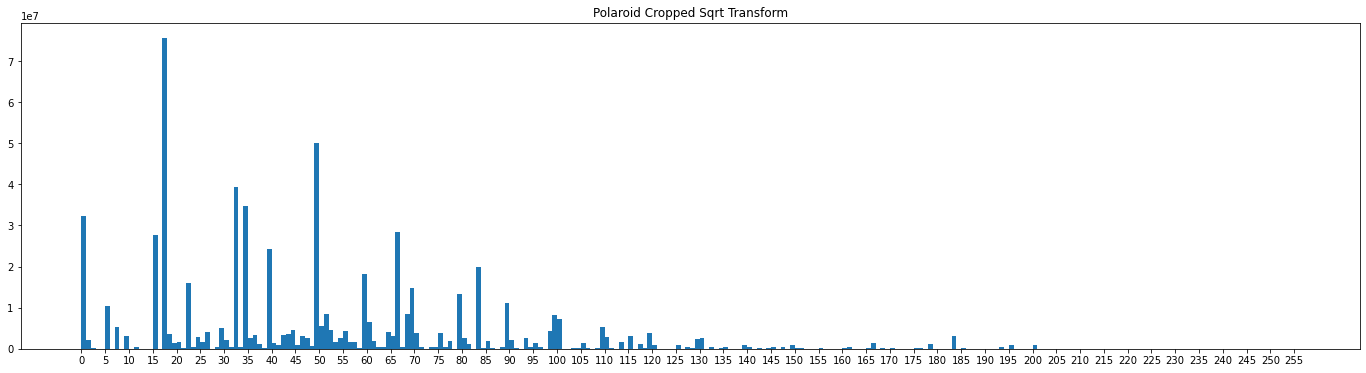

In [3]:
label = ['Lion Cubs', 'Polaroid Original', 'Polaroid Cropped', 'Polaroid Cropped w/o Occlusion', 'Polaroid Cropped Sqrt Transform']
path = ['../../img_dataset/lioncubs/images/', 
        '../../img_dataset/polaroid/images/', 
        '../../img_dataset/polaroid_crop/images/',
        '../../img_dataset/polaroid_crop_best/images/',
        '../../img_dataset/polaroid_crop_sqrt/images/']

for idx in range(len(path)):
    print('Plotting:', label[idx])
    merged_pixel = None
    avg_skew = 0
    img_names = os.listdir(path[idx])
    for i in tqdm(img_names):
        img = cv2.imread(path[idx] + i, 0)
        avg_skew += skew(img.ravel())
        if merged_pixel is None: merged_pixel = img.ravel()
        else: merged_pixel = np.concatenate((merged_pixel, img.ravel()))

    print("Avg Skewness:", round(avg_skew / len(img_names), 2))
    
    plt.figure(figsize=(24, 6))
    plt.title(label[idx])
    plt.xticks(np.arange(0, 256, 5))
    plt.hist(merged_pixel, 256, [0,256])
    plt.show()

## Apply Log & Square Root Pixel Transforamtion

3.326968548090574


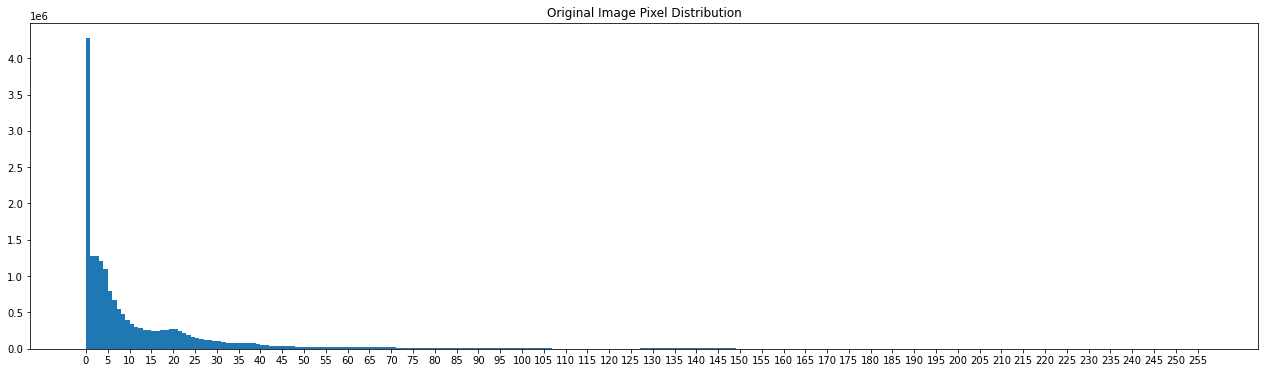

1.3141346475472737


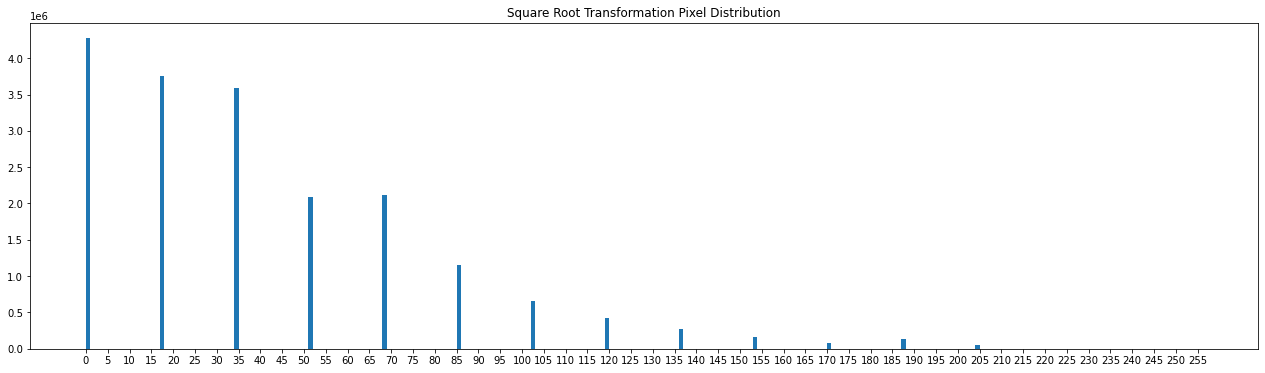

/home/jiwon/miniconda3/envs/hologram/lib/python3.7/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


0.5566915170274882


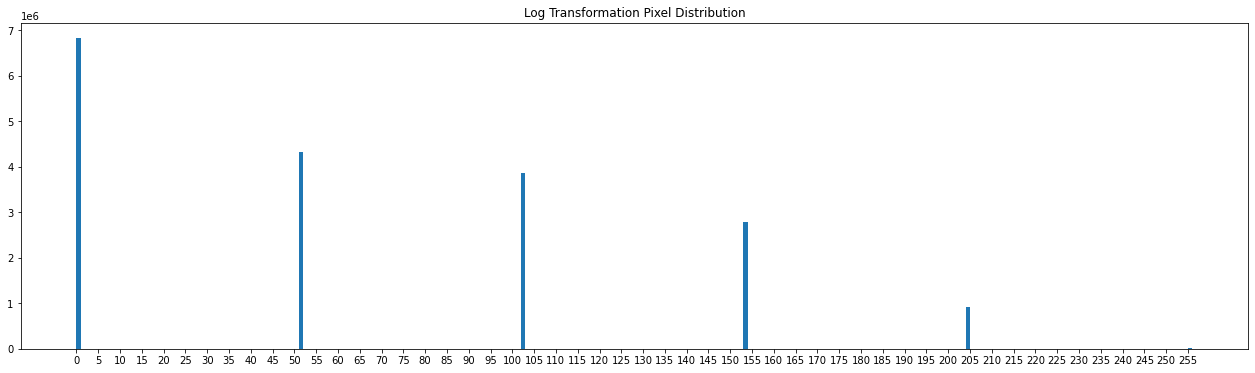

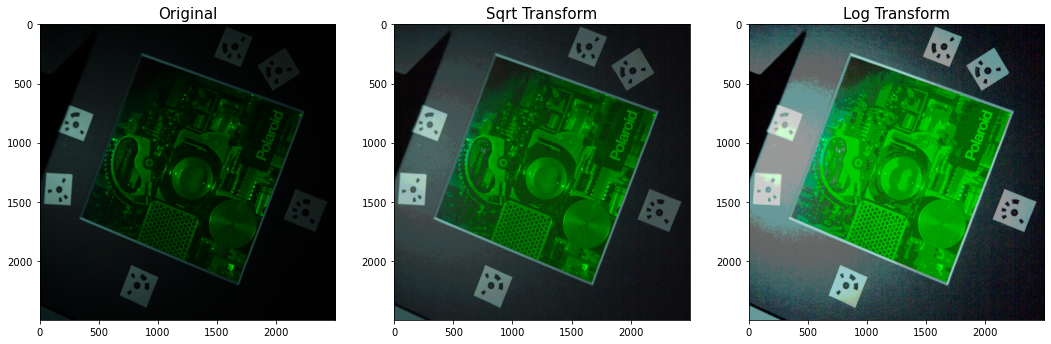

In [4]:
img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
print(skew(img.ravel()))
plt.figure(figsize=(22, 6))
plt.title('Original Image Pixel Distribution')
plt.xticks(np.arange(0, 256, 5))
plt.hist(img.ravel(), 256, [0,256])
plt.show()

img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
h = img.shape[0]
w = img.shape[1]
for y in range(0, h):
    for x in range(0, w):
        img[y, x] = np.sqrt(img[y, x])
print(skew(img.ravel()))
sqrt_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(22, 6))
plt.title('Square Root Transformation Pixel Distribution')
plt.xticks(np.arange(0, 256, 5))
plt.hist(sqrt_img.ravel(), 256, [0,256])
plt.show()

img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
h = img.shape[0]
w = img.shape[1]
for y in range(0, h):
    for x in range(0, w):
        img[y, x] = np.log(img[y, x])
print(skew(img.ravel()))
log_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
plt.figure(figsize=(22, 6))
plt.title('Log Transformation Pixel Distribution')
plt.xticks(np.arange(0, 256, 5))
plt.hist(log_img.ravel(), 256, [0,256])
plt.show()

img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
f, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(img)
ax[1].set_title(f'Sqrt Transform', fontsize = 15)
ax[1].imshow(sqrt_img)
ax[2].set_title(f'Log Transform', fontsize = 15)
ax[2].imshow(log_img)

## Testing Sqrt Transformation Minmax Normalization Beta Rate

1.3141346475472737


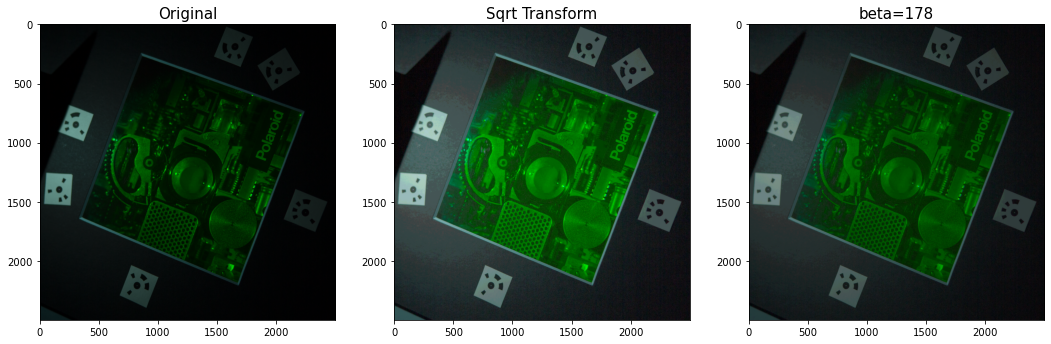

In [5]:
img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
h = img.shape[0]
w = img.shape[1]
for y in range(0, h):
    for x in range(0, w):
        img[y, x] = np.sqrt(img[y, x])
print(skew(img.ravel()))
sqrt_img_adj = cv2.normalize(img, None, alpha=0, beta=178, norm_type=cv2.NORM_MINMAX)
sqrt_img = cv2.normalize(img, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
f, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(img)
ax[1].set_title(f'Sqrt Transform', fontsize = 15)
ax[1].imshow(sqrt_img)
ax[2].set_title(f'beta=178', fontsize = 15)
ax[2].imshow(sqrt_img_adj)

## Apply Square Root Transform to Polaroid Dataset

In [6]:
# DO NOT RUN IF YOU ALREADY HAVE THE IMG IN THE DIRECTORY
run_sqrt = input("Would you like to apply sqrt transform to the Polaroid dataset? (Y/n)")
if run_sqrt == 'Y':
    read_path = '../../img_dataset/polaroid_crop/images/'
    save_path = '../../img_dataset/polaroid_crop_sqrt/images/'
    img_names = os.listdir(read_path)
    for i in tqdm(img_names):
        img = cv2.imread(read_path + i)
        sqrt_img = sqrt_transform(img)
        cv2.imwrite(save_path + i, sqrt_img)

## Apply CLAHE Pixel Transformation

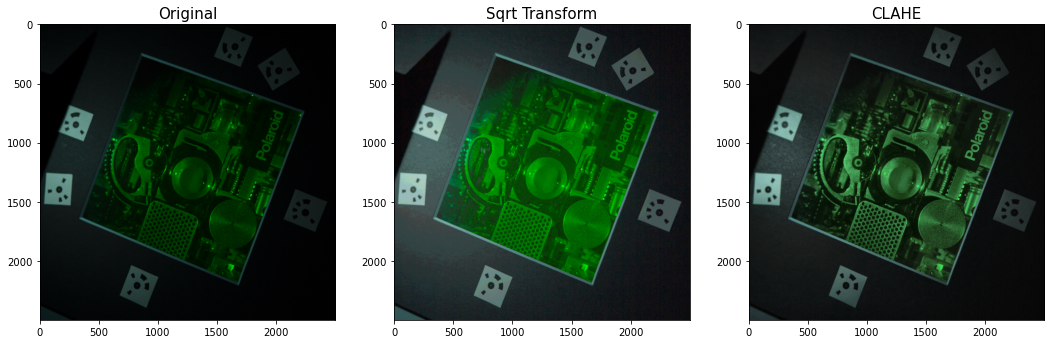

In [10]:
img = cv2.imread('../../img_dataset/polaroid_crop/images/911A8047.png')
clahe_img = clahe_transform(img)

f, ax = plt.subplots(1, 3, figsize=(18, 6))
ax[0].set_title(f'Original', fontsize = 15)
ax[0].imshow(img)
ax[1].set_title(f'Sqrt Transform', fontsize = 15)
ax[1].imshow(sqrt_img)
ax[2].set_title(f'CLAHE', fontsize = 15)
ax[2].imshow(clahe_img)

## Apply CLAHE Transformation to Polaroid Dataset

In [11]:
# DO NOT RUN IF YOU ALREADY HAVE THE IMG IN THE DIRECTORY
run_clahe = input("Would you like to apply CLAHE transform to the Polaroid dataset? (Y/n)")
if run_clahe == 'Y':
    read_path = '../../img_dataset/polaroid_crop/images/'
    save_path = '../../img_dataset/polaroid_crop_clahe/images/'
    img_names = os.listdir(read_path)
    for i in tqdm(img_names):
        img = cv2.imread(read_path + i)
        clahe_img = clahe_transform(img)
        cv2.imwrite(save_path + i, clahe_img)

100%|██████████| 100/100 [00:30<00:00,  3.29it/s]
